In [9]:
import pandas as pd

In [10]:
#zad1: wczytaj plik do obiektu DataFrame
df = pd.read_csv('fatal-police-shootings-data.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [14]:
#zad2: Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego, 
# czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).
import numpy as np
df_pivot = df.pivot_table(values='id',index='race',columns='signs_of_mental_illness',aggfunc=np.count_nonzero)
df_pivot

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


In [63]:
braki_race = df['race'].isna().sum() #nie uwzględniamy w tabeli per race (nie mamy przypisania race dla 521 obserwacji)
print(braki_race)

521


In [16]:
#zad3: Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki 
# choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.

# Funkcja rate, która oblicza stosunek True / (True + False)
def rate(row):
    return row[True] / (row[True] + row[False])

# Dodanie nowej kolumny 'Rate_True' do df_pivot
df_pivot['Rate_True'] = df_pivot.apply(rate, axis=1)
# Zamiana wartości w 'Rate_True' na procenty
df_pivot['Rate_True'] = df_pivot['Rate_True'] * 100
df_pivot['Rate_True'] = df_pivot['Rate_True'].round(2).astype(str) + '%'
#posortować
df_pivot = df_pivot.sort_values(by='Rate_True', ascending=False)
df_pivot


signs_of_mental_illness,False,True,Rate_True
race,,,
W,1763,713,28.8%
A,69,24,25.81%
O,37,11,22.92%
N,64,14,17.95%
H,745,157,17.41%
B,1114,184,14.18%


### Największym odsetkiem znamion choroby psychicznej podczas interwencji charakteryzuje się rasa W

In [22]:
#zad4: Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. 
# Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.day_name()

df_day_counts = df['day_of_week'].value_counts()
df_day_counts


day_of_week
Wednesday    829
Tuesday      816
Thursday     810
Friday       761
Sunday       753
Monday       726
Saturday     721
Name: count, dtype: int64

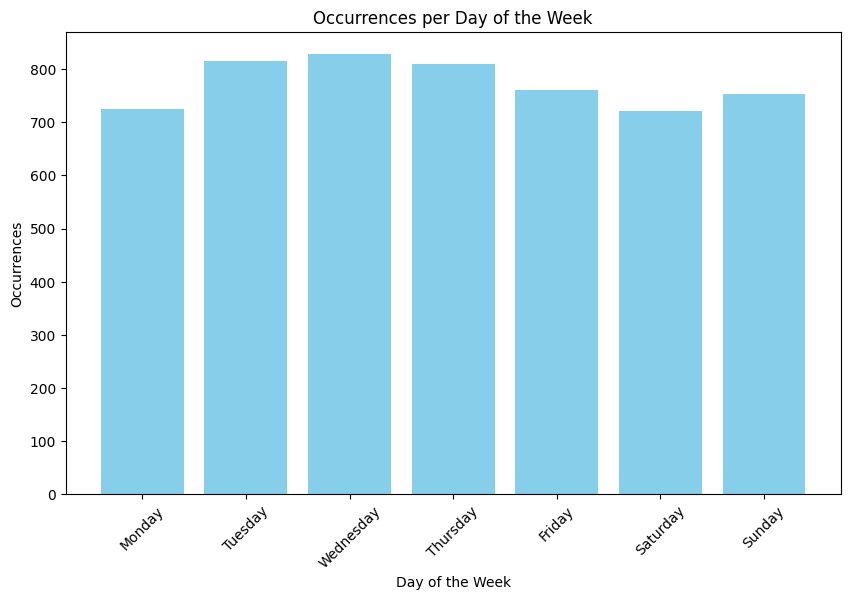

In [25]:
# wykres kolumnowy
import matplotlib.pyplot as plt

ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_day_counts = df_day_counts.reindex(ordered_days)

# Tworzenie wykresu kolumnowego
plt.figure(figsize=(10, 6))
plt.bar(df_day_counts.index, df_day_counts.values, color='skyblue')
plt.xlabel("Day of the Week")
plt.ylabel("Occurrences")
plt.title("Occurrences per Day of the Week")
plt.xticks(rotation=45)
plt.show()

In [34]:
#zad5: Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. 
# Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu 
# na 1000 mieszkańców każdego ze stanów.
population = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)
df_population = population[0]
df_population.head()

,"Rank in states & territories, 2020","Rank in states & territories, 2010",State,"Census population, April 1, 2020 [1][2]","Census population, April 1, 2010 [1][2]","Percent change, 2010–2020 [note 1]","Absolute change, 2010-2020","Total seats in the U.S. House of Representatives, 2023–2033",Census population per electoral vote [note 2],Census population per House seat,"Percent of the total U.S. population, 2020 [note 3]"
0,1,1,California,39538223,37253956,6.1%,+2284267,52,732189,760350,11.80%
1,2,2,Texas,30145505,25145561,15.9%,+3999944,38,728638,766987,8.70%
2,3,4,Florida,21538187,18801310,14.6%,+2736877,28,717940,769221,6.43%
3,4,3,New York,20201249,19378102,4.2%,+823147,26,721473,776971,6.03%
4,5,6,Pennsylvania,13002700,12702379,2.4%,+300321,17,684353,764865,3.88%


In [36]:
states = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=0)
df_states = states[1]
df_states

,Name,Status of region,ISO,ANSI,ANSI.1,USPS,USCG,GPO,AP,Other abbreviations
0,Name,Status of region,NaN,NaN,NaN,NaN,NaN,GPO,AP,Other abbreviations
1,United States of America,Federal state,US USA 840,US,0.0,NaN,NaN,U.S.,U.S.,U.S.A.
2,Alabama,State,US-AL,AL,1.0,AL,AL,Ala.,Ala.,NaN
3,Alaska,State,US-AK,AK,2.0,AK,AK,Alaska,Alaska,Ak.[2]
4,Arizona,State,US-AZ,AZ,4.0,AZ,AZ,Ariz.,Ariz.,NaN
...,...,...,...,...,...,...,...,...,...,...
74,Nebraska,Obsolete postal code[g],NaN,NaN,NaN,NB,NaN,NaN,NaN,NaN
75,Northern Mariana Islands,Obsolete postal code[h],NaN,NaN,NaN,CM,NaN,NaN,NaN,NaN
76,Panama Canal Zone,Obsolete postal code,PZ PCZ 594,NaN,NaN,CZ,NaN,NaN,NaN,NaN
77,Philippine Islands,Obsolete postal code,PH PHL 608[11],NaN,NaN,PI,NaN,NaN,NaN,NaN


In [38]:
#tabela dla populacji
df_population_USA = df_population[['State', 'Census population, April 1, 2020 [1][2]']]
df_population_USA = df_population_USA.rename(columns={'State' : 'Name', 'Census population, April 1, 2020 [1][2]': 'Population'})
df_population_USA.head()

,Name,Population
0,California,39538223
1,Texas,30145505
2,Florida,21538187
3,New York,20201249
4,Pennsylvania,13002700


In [39]:
#tabela dla oznaczenia stanów
df_states_USA = df_states[['USPS', 'Name']]
df_states_USA = df_states_USA.rename(columns={'USPS': 'state'})
df_states_USA.head()

,state,Name
0,NaN,Name
1,NaN,United States of America
2,AL,Alabama
3,AK,Alaska
4,AZ,Arizona


In [43]:
#merge dwóch tabel z html
df_merged = pd.merge(df_states_USA, df_population_USA, on='Name', how='inner')  # inner, outer, left, right
df_merged.head()

,state,Name,Population
0,AL,Alabama,5024279
1,AK,Alaska,733391
2,AZ,Arizona,7151502
3,AR,Arkansas,3011524
4,CA,California,39538223


In [47]:
#zliczenie wystąpień per state z głównej df
df_total_per_state = df['state'].value_counts()
df_total_per_state.head()

state
CA    799
TX    481
FL    350
AZ    254
CO    195
Name: count, dtype: int64

In [48]:
#połączenie do finalnej analizy
df_merged_total = pd.merge(df_total_per_state, df_merged, on='state', how='left') 
df_merged_total.head()

,state,count,Name,Population
0,CA,799,California,39538223
1,TX,481,Texas,30145505
2,FL,350,Florida,21538187
3,AZ,254,Arizona,7151502
4,CO,195,Colorado,5773714


In [65]:
#obliczenie wystąpień per 1000 mieszkańców dla każdego stanu
df_merged_total['per_1000'] = (1000 * df_merged_total['count']) / df_merged_total['Population']
# Zamiana wartości w 'per_1000' na procenty
"""df_merged_total['per_1000'] = df_merged_total['per_1000'] * 100
df_merged_total['per_1000'] = df_merged_total['per_1000'].round(2).astype(str) + '%'"""
df_sorted = df_merged_total.sort_values(by='per_1000', ascending=False)
print(df_sorted[['state', 'Name', 'per_1000']].to_string(index=False))

state                 Name  per_1000
   AK               Alaska  0.053178
   NM           New Mexico  0.050059
   OK             Oklahoma  0.041421
   AZ              Arizona  0.035517
   CO             Colorado  0.033774
   NV               Nevada  0.030922
   WV        West Virginia  0.030105
   MT              Montana  0.028592
   AR             Arkansas  0.027561
   WY              Wyoming  0.024270
   LA            Louisiana  0.023402
   MO             Missouri  0.022909
   ID                Idaho  0.022837
   MS          Mississippi  0.021950
   KY             Kentucky  0.021084
   OR               Oregon  0.020768
   AL              Alabama  0.020699
   HI               Hawaii  0.020615
   CA           California  0.020208
   TN            Tennessee  0.020113
   WA           Washington  0.019727
   SD         South Dakota  0.019173
   DC District of Columbia  0.018853
   UT                 Utah  0.018340
   SC       South Carolina  0.017193
   KS               Kansas  0.017019
 